<center><h1>Pet Adoption</h1>

## Problem Statement from the competition itself:
    - A leading pet adoption agency is planning to create a virtual tour experience for their customers showcasing all animals that are available in their shelter. To enable this tour experience, you are required to build a Machine Learning model that determines type and breed of the animal based on its physical attributes and other factors
    
## Competition Link:
    - https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-pet-adoption/problems/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import pickle
from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('/content/drive/My Drive/Pet Adoption/Dataset/train.csv')
test = pd.read_csv('/content/drive/My Drive/Pet Adoption/Dataset/test.csv')

In [ ]:
print('Shape of train:', train.shape)
print('Shape of test:', test.shape)

Shape of train: (18834, 11)
Shape of test: (8072, 9)


In [ ]:
print('\nTrain columns:', train.columns)
print('\n\nTest columns:', test.columns)


Train columns: Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')


Test columns: Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2'],
      dtype='object')


In [ ]:
print('Head of train:\n')
train.head()

Head of train:



,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [ ]:
print('Head of test:\n')
test.head()

Head of test:



,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2
0,ANSL_75005,2005-08-17 00:00:00,2017-09-07 15:35:00,0.0,Black,0.87,42.73,0,7
1,ANSL_76663,2018-11-15 00:00:00,2019-05-08 17:24:00,1.0,Orange Tabby,0.06,6.71,0,1
2,ANSL_58259,2012-10-11 00:00:00,2018-04-02 16:51:00,1.0,Black,0.24,41.21,0,7
3,ANSL_67171,2015-02-13 00:00:00,2018-04-06 07:25:00,1.0,Black,0.29,8.46,7,1
4,ANSL_72871,2017-01-18 00:00:00,2018-04-26 13:42:00,1.0,Brown,0.71,30.92,0,7


<center><h1>Exploratory Data Analysis</h1>

# Check for null values and data type

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [ ]:
train.columns


Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [ ]:
val_cnt_col = ['condition', 'color_type', 'X1', 'X2', 'breed_category', 'pet_category']

for i in val_cnt_col:
    print("Value count for the column '{}'".format(i))
    print(train[i].value_counts(), '\n')
    print('-'*25,'\n')

Value count for the column 'condition'
1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64 

------------------------- 

Value count for the column 'color_type'
Black                4620
White                2453
Brown                1791
Brown Tabby          1687
Tan                  1349
Blue                  852
Orange Tabby          791
Red                   526
Brown Brindle         496
Tricolor              469
Blue Tabby            386
Tortie                366
Calico                343
Gray                  307
Chocolate             259
Torbie                242
Cream Tabby           191
Sable                 167
Cream                 162
Fawn                  159
Yellow                143
Buff                  125
Lynx Point            117
Blue Merle            104
Seal Point             78
Black Brindle          66
Gray Tabby             65
Black Tabby            55
Flame Point            52
Orange                 39
Brown Merle            39
Black Smoke        

# Null values with seaborn


Check the null values with the seaborn



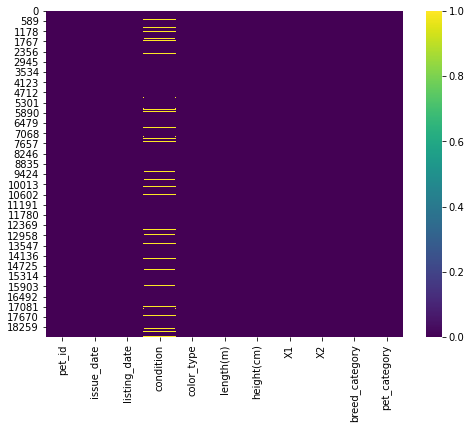

In [ ]:
print('\nCheck the null values with the seaborn\n')

plt.figure(figsize = (8,6))
sns.heatmap(train.isnull() == True, cmap = 'viridis')

### Observation:
- We see few null values under condition feature. We will fill it with -1

### Deep copy of the train data

In [349]:
trainc = copy.deepcopy(train)
trainc.fillna(-1, inplace = True)

<center><h1>Machine Learning Model</h1>

# Steps involved:

- Algorithm:
    - LightGBM
      - Hyperparameters tuned: Maximum depth (max_depth) and n_estimators
  
- Hyperparameter Tuning with:
    - GridSearchCV

- Building machine learning model:
    - We will first predict the breed_category (dropping pet_category).
    - Then while predicting pet_category, we will consider breed_category as one of feature.

In [350]:
trainc.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,-1.0,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


## Statistical analysis of the numerical features

In [351]:
trainc.describe()

,condition,length(m),height(cm),X1,X2,breed_category,pet_category
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.735691,0.502636,27.448832,5.369598,4.577307,0.600563,1.709143
std,0.896321,0.288705,13.019781,6.572366,3.517763,0.629883,0.717919
min,-1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,16.172500,0.000000,1.000000,0.000000,1.000000
50%,1.000000,0.500000,27.340000,0.000000,4.000000,1.000000,2.000000
75%,1.000000,0.760000,38.890000,13.000000,9.000000,1.000000,2.000000
max,2.000000,1.000000,50.000000,19.000000,9.000000,2.000000,4.000000


## Correlation to check how independent and dependent variables are correlated

Correlation with heatmap



<function matplotlib.pyplot.show>

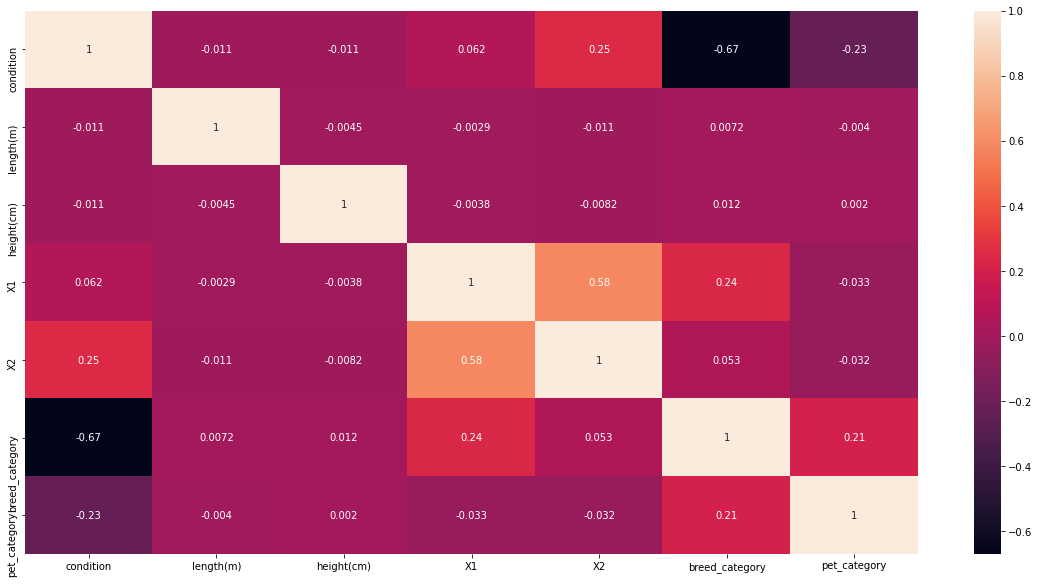

In [352]:
print('Correlation with heatmap\n')

plt.figure(figsize = (20,10))
sns.heatmap(trainc.corr(), annot = True)
plt.show

### Observation:
- No features are highly correlated with each other. So, not necessary to remove any features based on correlation value with each other.

- However, we will drop condition feature while predicting pet_category as the correlation of condition with pet_category is very less


## Model training with breed_category as target variable
- Run the below cell only if breed_category is a target variable

In [361]:
# breed_category
# independent variables for predicting breed_category
x = trainc[['condition', 'color_type', 'X1', 'X2']]

# target variable as breed_category
y = trainc['breed_category']

## Model training with pet_category as target variable
- Run the below cell only if pet_category is a target variable
- Considering breed_category as one of our independent features

In [394]:
# pet_category
# independent variables for predicting pet_category
x = trainc[['color_type', 'X1', 'X2', 'breed_category']]

# target variable as pet_category
y = trainc['pet_category']

## Feature engineering
- Adding X1 and X2

In [395]:
x['x12'] = x['X1'] + x['X2']

## Filling null values with -1

In [396]:
x.fillna(-1, inplace = True)

## Label encoding color type feature

In [397]:
from sklearn.preprocessing import LabelEncoder

# color type
color = LabelEncoder()
x['color_type'] = color.fit_transform(x['color_type'])

## Model training with LGBMClassifier and hyperparameter tuning with GridSearchCV

In [398]:
%%time

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth':  [2, 3, 5, 8, 10, 12],
          'n_estimators': [30, 50, 70, 90, 110, 150, 170, 200, 250]}

lgb = LGBMClassifier()

lgb_clf = GridSearchCV(lgb, params, cv = 4, return_train_score = True, scoring = 'f1_weighted')

lgb_clf.fit(x.values, y.values)

CPU times: user 3min 39s, sys: 2.9 s, total: 3min 42s
Wall time: 3min 42s


In [399]:
print('Best hyperparameter:', lgb_clf.best_params_)
print('Best score:', lgb_clf.best_score_)

Best hyperparameter: {'max_depth': 10, 'n_estimators': 200}
Best score: 0.8732489062641269


<center><h1>Test Prediction</h1>

In [400]:
testc = copy.deepcopy(test)

## Predicting breed_category
- Run the below cell only if predicting breed_category

In [385]:
# fetures for predicting breed_category
xte = testc[['condition', 'color_type', 'X1', 'X2']]

## Predicting pet_category
- Run the below cell only if predicting pet_category

In [401]:
# fetures for predicting pet_category
xte = testc[['color_type', 'X1', 'X2']]

## Feature engineering
- Adding X1 and X2

In [402]:
xte['x12'] = xte['X1'] + xte['X2']

## Filling null values with -1

In [403]:
xte.fillna(-1, inplace = True)

## Label encoding color type feature

In [404]:
from sklearn.preprocessing import LabelEncoder

# color type
xte['color_type'] = color.transform(xte['color_type'])

## We will consider breed_category for predicting pet_category
- Run the below cell only if predicting pet_category

In [406]:
xte['breed_category'] = pred_breed

xte = xte[x.columns]

xte.columns

Index(['color_type', 'X1', 'X2', 'breed_category', 'x12'], dtype='object')

## Predicting breed_category
- Run the below cell only if predicting breed_category

In [377]:
pred_breed = lgb_clf.predict(xte.values)

## Predicting pet_category
- Run the below cell only if predicting pet_category

In [407]:
pred_pet = lgb_clf.predict(xte.values)

## Creating a submission dataframe

In [408]:
sub = pd.DataFrame()
sub['pet_id'] = testc['pet_id']
sub['breed_category'] = pred_breed
sub['pet_category'] = pred_pet

In [409]:
sub.head()

,pet_id,breed_category,pet_category
0,ANSL_75005,1.0,2
1,ANSL_76663,0.0,1
2,ANSL_58259,0.0,2
3,ANSL_67171,0.0,1
4,ANSL_72871,0.0,2


In [411]:
sub.to_csv('lgbm-final.csv', index = False)

<center><h1>END</h1>